In [1]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

In [4]:
print(os.path.exists("C:/Users/sofi9/Desktop/ІТ СМАРТ-СИСТЕМ/obesity.csv"))

True


In [5]:
ds = pd.read_csv("C:/Users/sofi9/Desktop/ІТ СМАРТ-СИСТЕМ/obesity.csv")

In [6]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  17 

columns:  ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS', 'NObeyesdad']


In [7]:
print('Samples count: ',ds.shape[0])

Samples count:  2111


In [8]:
display(ds.head(5))

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
for col in ds.columns:
    if ds[col].isnull().values.any():
        print("Missing data in ", col)

In [10]:
print("Any missing sample in training set:",ds.isnull().values.any())

Any missing sample in training set: False


In [11]:
ds.nunique()

Age                               1402
Gender                               2
Height                            1574
Weight                            1525
CALC                                 4
FAVC                                 2
FCVC                               810
NCP                                635
SCC                                  2
SMOKE                                2
CH2O                              1268
family_history_with_overweight       2
FAF                               1190
TUE                               1129
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

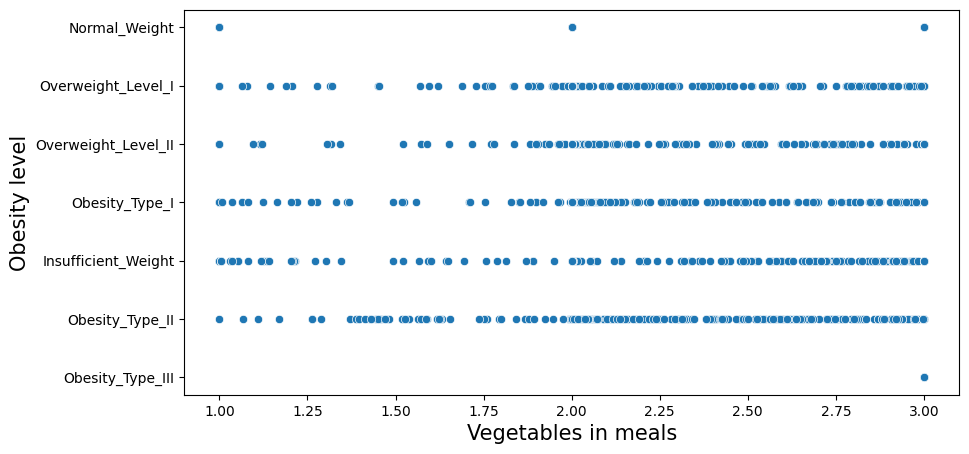

In [13]:
plt.rcParams["figure.figsize"] = (10,5)
sns.scatterplot(data=ds, x="FCVC", y="NObeyesdad", palette="dark")
plt.xlabel("Vegetables in meals",fontsize=15)
plt.ylabel("Obesity level",fontsize=15)
plt.show()

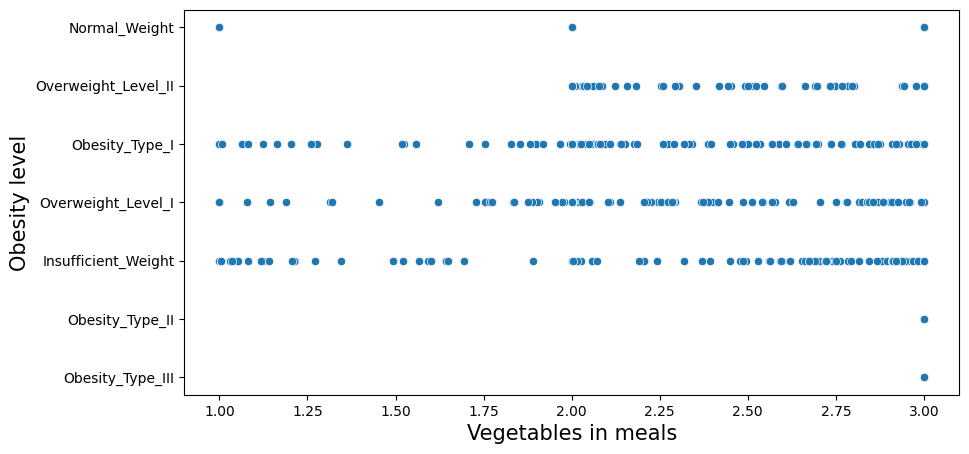

In [14]:
plt.rcParams["figure.figsize"] = (10,5)
sns.scatterplot(data=ds[ds['Gender']=="Female"], x="FCVC", y="NObeyesdad", palette="dark")
plt.xlabel("Vegetables in meals",fontsize=15)
plt.ylabel("Obesity level",fontsize=15)
plt.show()

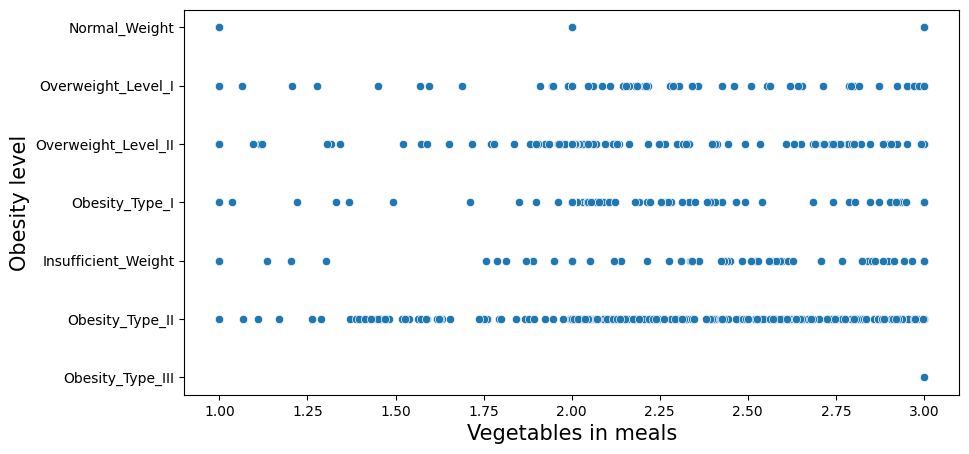

In [15]:
plt.rcParams["figure.figsize"] = (10,5)
sns.scatterplot(data=ds[ds['Gender']=="Male"], x="FCVC", y="NObeyesdad", palette="dark")
plt.xlabel("Vegetables in meals",fontsize=15)
plt.ylabel("Obesity level",fontsize=15)
plt.show()

In [17]:
ds.pivot_table(['FAF', 'CH2O', 'NCP', 'TUE'],  ['Gender'], aggfunc='mean')

,CH2O,FAF,NCP,TUE
Gender,,,,
Female,1.941083,0.847137,2.632419,0.647227
Male,2.073373,1.169639,2.737592,0.668256


Total members: 1726


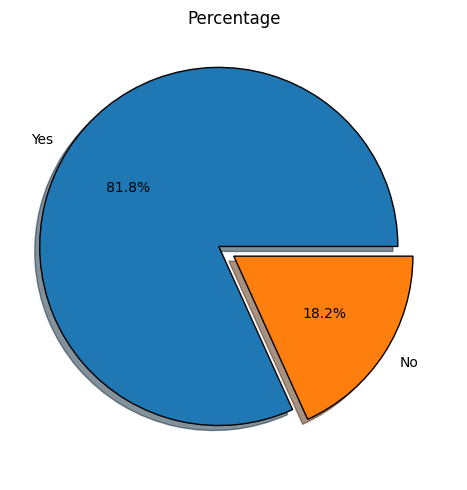

In [18]:
yes = ds[ds['family_history_with_overweight'] == "yes"].shape[0]
no = ds[ds['family_history_with_overweight'] == "no"].shape[0]
print("Total members: {}".format(yes))
plt.rcParams["figure.figsize"] = (7, 5)
slices = [yes, no]
labels = ['Yes', 'No']
explode = [0.1, 0]
plt.pie(slices, labels=labels, explode=explode, wedgeprops={'edgecolor': 'black'}, shadow=True, autopct='%1.1f%%')
plt.title("Percentage")
plt.tight_layout()
plt.show()

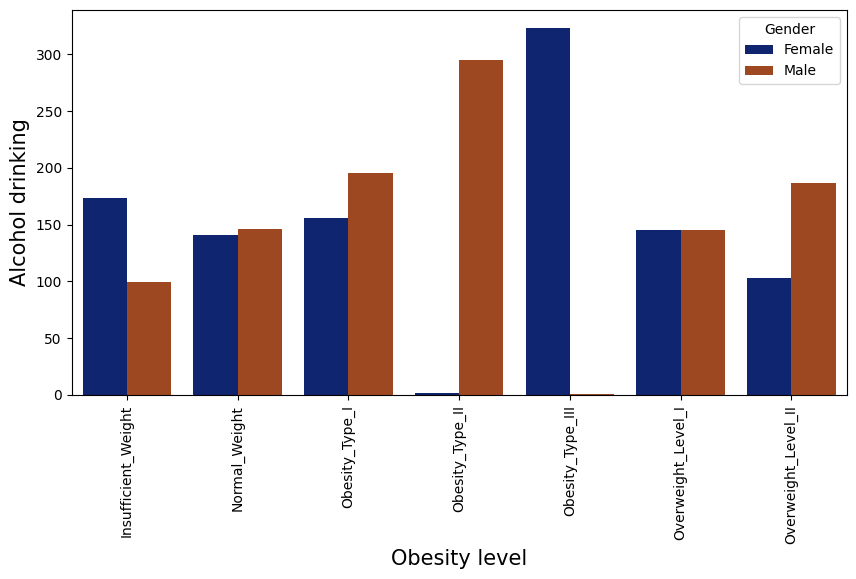

In [22]:
ds['Gender'] = ds['Gender'].astype(str)
plt.rcParams["figure.figsize"] = (10, 5)
grouped_data = ds.groupby(["NObeyesdad", "Gender"]).size().reset_index(name="CALC")
sns.barplot(data=grouped_data, x="NObeyesdad", y="CALC", hue="Gender", palette="dark")
plt.xlabel("Obesity level", fontsize=15)
plt.ylabel("Alcohol drinking", fontsize=15)
plt.xticks(rotation=90)
plt.show()

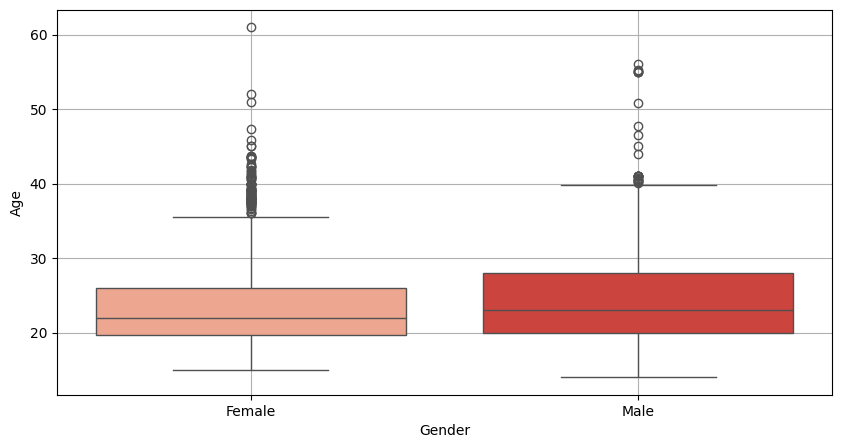

In [23]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
sns.boxplot(x=ds["Gender"],y=ds['Age'],palette = "Reds", ax=ax)
ax.yaxis.grid(True) 
ax.xaxis.grid(True) 

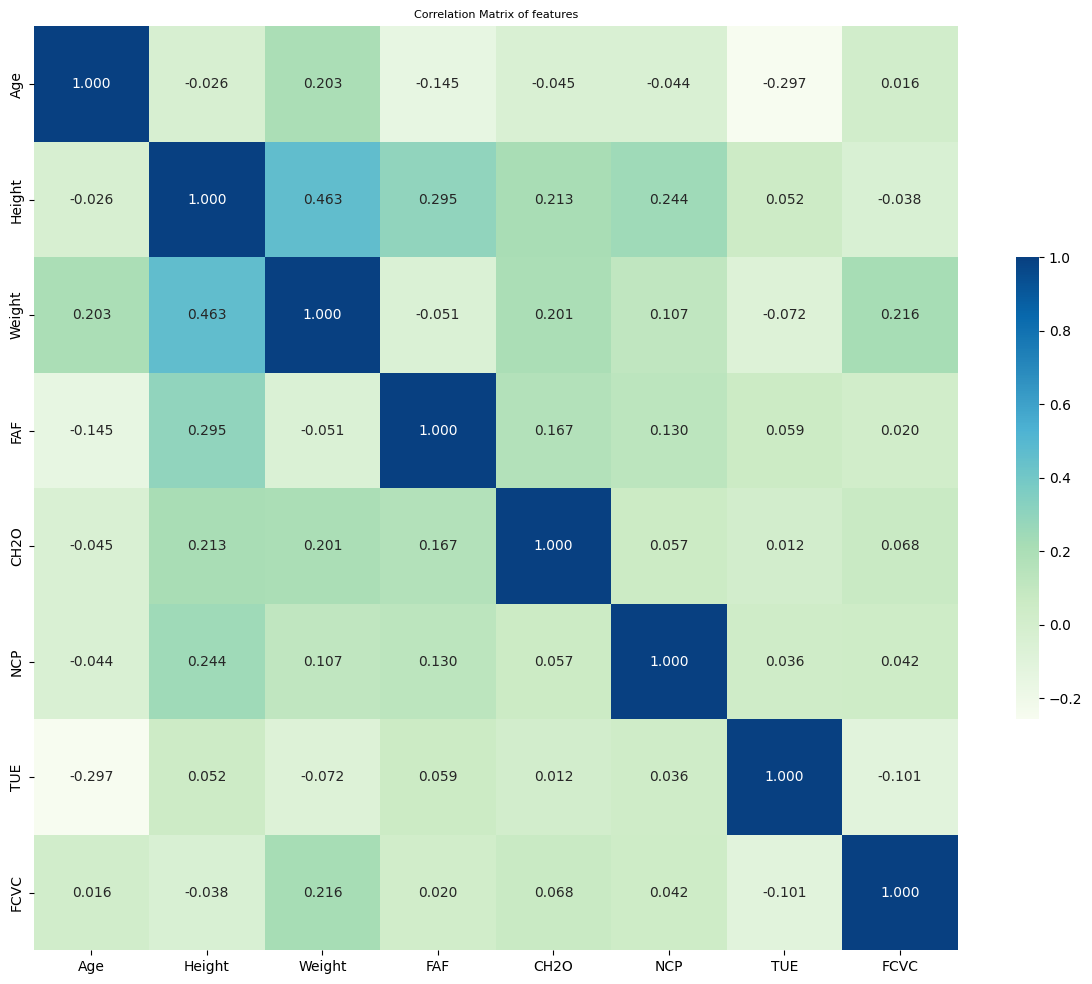

In [24]:
col_for_corr = ['Age', 'Height', 'Weight', 'FAF', 'CH2O', 'NCP', 'TUE', 'FCVC']
plt.rcParams["figure.figsize"] = (15,12)
correlation_matrix = ds[col_for_corr].corr()
sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.3f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=8)
plt.show()

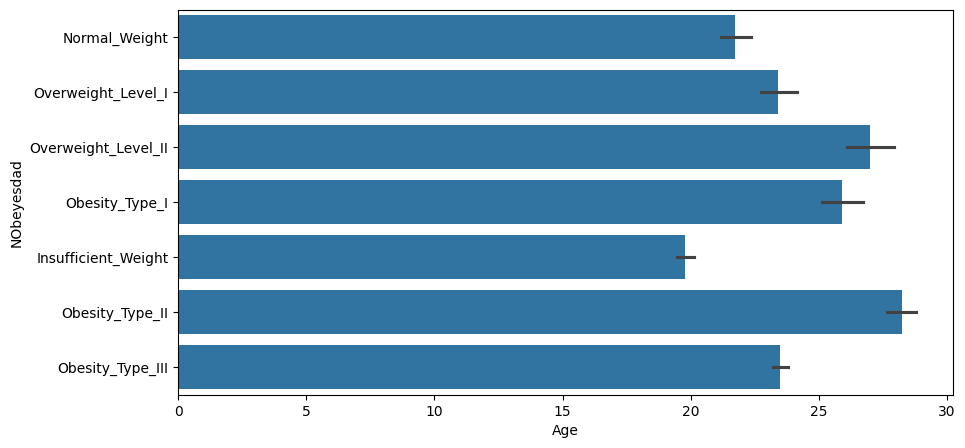

In [26]:
plt.rcParams["figure.figsize"] = (10,5)
graph = ds[["Age", "NObeyesdad"]]
ax = sns.barplot(x="Age", y="NObeyesdad", data=graph)

<Axes: >

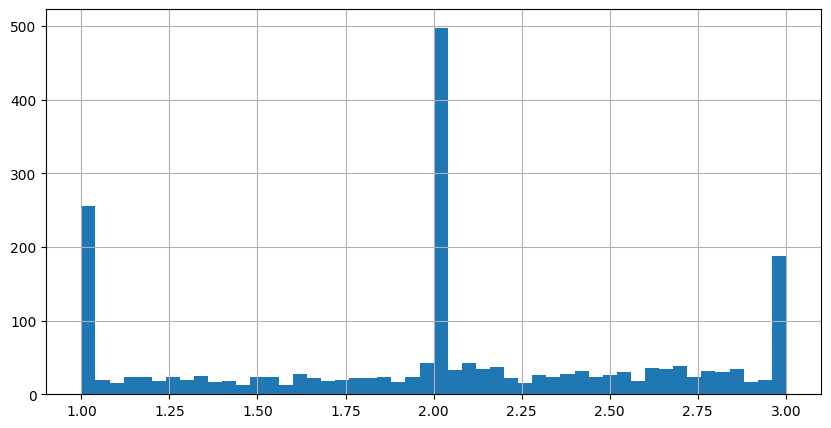

In [29]:
ds[ds['CH2O']<150]['CH2O'].hist(bins=50)

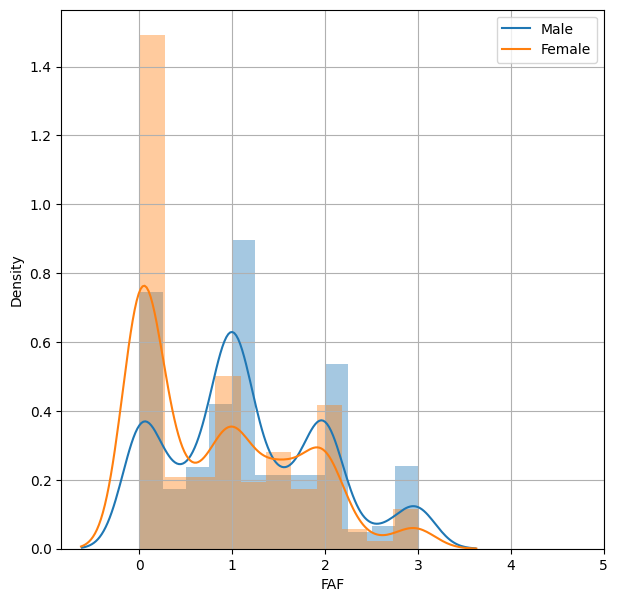

In [32]:
def plot_distro(df, col = '', y_limit=None, x_limit_r=None, x_limit_l = None):
    plt.figure(figsize=(7,7))
    plt.grid(True)
    sns.distplot(df[col][df.Gender == "Male"])
    sns.distplot(df[col][df.Gender == "Female"])
    plt.legend(['Male', 'Female'])
    if y_limit:
        plt.ylim(top=y_limit)
    if x_limit_r:
        plt.xlim(right=x_limit_r)
    if x_limit_l:
        plt.xlim(left=x_limit_l) 
plot_distro(ds, col='FAF', x_limit_r=5)

In [87]:
from sklearn.preprocessing import OneHotEncoder
ds.nunique()

Age                               1402
Gender                               2
Height                            1574
Weight                            1525
CALC                                 4
FAVC                                 2
FCVC                               810
NCP                                635
SCC                                  2
SMOKE                                2
CH2O                              1268
family_history_with_overweight       2
FAF                               1190
TUE                               1129
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [88]:
ds['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [89]:
tmp = pd.get_dummies(ds['Gender'])
tmp.head()

,Female,Male
0,True,False
1,True,False
2,False,True
3,False,True
4,False,True


In [90]:
ds['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [91]:
ds['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [92]:
tmp = pd.get_dummies(ds['SMOKE'])
tmp.head()

,no,yes
0,True,False
1,False,True
2,True,False
3,True,False
4,True,False


In [93]:
ds['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [94]:
tmp = pd.get_dummies(ds['MTRANS'])
tmp.head()

,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,False,True
4,False,False,False,True,False


In [95]:
tmp = pd.get_dummies(ds['CAEC'])
tmp.head()

,Always,Frequently,Sometimes,no
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [39]:
ds_transformed = ds.copy()
numeric_features = ['FAF', 'CH2O', 'NCP', 'TUE']
for feature in numeric_features:
    ds_transformed[feature] = np.log(ds_transformed[feature] + 1)

In [45]:
print(ds_transformed.head())

    Age  Gender  Height  Weight        CALC FAVC  FCVC       NCP  SCC SMOKE  \
0  21.0  Female    1.62    64.0          no   no   2.0  1.386294   no    no   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  1.386294  yes   yes   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  1.386294   no    no   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  1.386294   no    no   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  0.693147   no    no   

       CH2O family_history_with_overweight       FAF       TUE       CAEC  \
0  1.098612                            yes  0.000000  0.693147  Sometimes   
1  1.386294                            yes  1.386294  0.000000  Sometimes   
2  1.098612                            yes  1.098612  0.693147  Sometimes   
3  1.098612                             no  1.098612  0.000000  Sometimes   
4  1.098612                             no  0.000000  0.000000  Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Tran

In [46]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
ds_discretized = ds_transformed.copy()
ds_discretized[numeric_features] = discretizer.fit_transform(ds_transformed[numeric_features])

In [47]:
print(ds_discretized.head())

    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  2.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  2.0  yes   yes   4.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  2.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  2.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  0.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  3.0  Sometimes  Public_Transportation   
1                            yes  4.0  0.0  Sometimes  Public_Transportation   
2                            yes  4.0  3.0  Sometimes  Public_Transportation   
3                             no  4.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Norm

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ds_scaled = ds_transformed.copy()
ds_scaled[numeric_features] = scaler.fit_transform(ds_transformed[numeric_features])
print(ds_scaled.head())

    Age  Gender  Height  Weight        CALC FAVC  FCVC       NCP  SCC SMOKE  \
0  21.0  Female    1.62    64.0          no   no   2.0  0.435943   no    no   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  0.435943  yes   yes   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  0.435943   no    no   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  0.435943   no    no   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0 -2.309972   no    no   

       CH2O family_history_with_overweight       FAF       TUE       CAEC  \
0  0.090717                            yes -1.383728  0.699830  Sometimes   
1  1.436677                            yes  1.784767 -1.213563  Sometimes   
2  0.090717                            yes  1.127245  0.699830  Sometimes   
3  0.090717                             no  1.127245 -1.213563  Sometimes   
4  0.090717                             no -1.383728 -1.213563  Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Tran

In [49]:
import seaborn as sns
import scipy.stats as stats
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

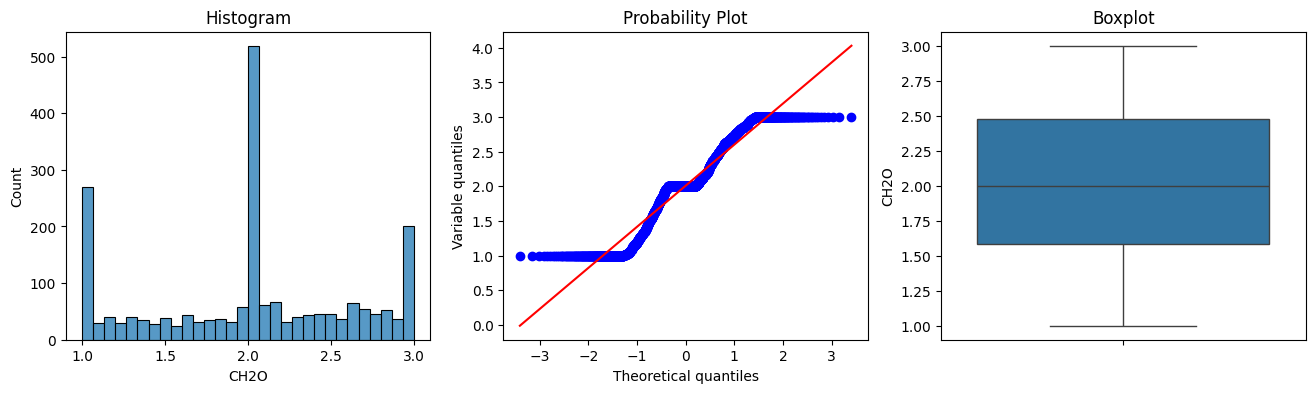

In [50]:
diagnostic_plots(ds, 'CH2O')

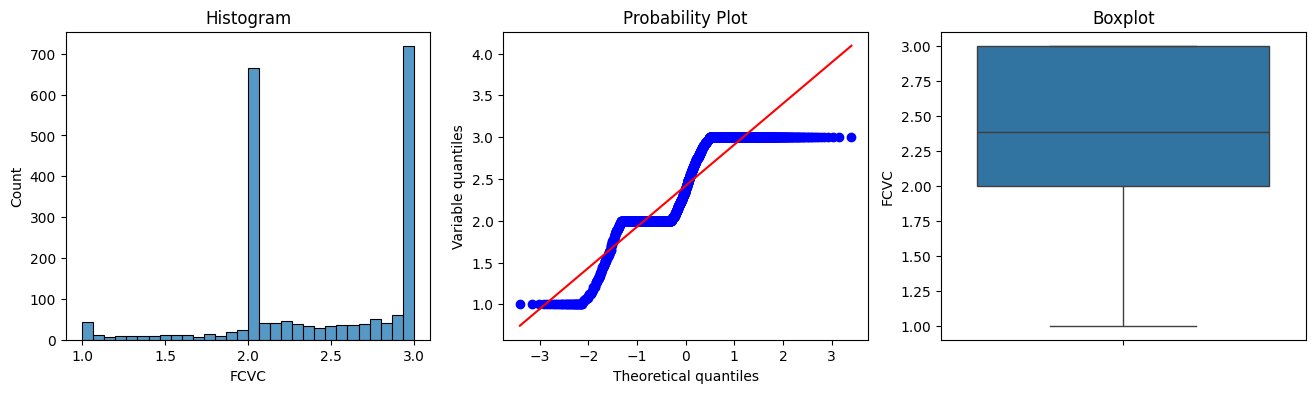

In [52]:
diagnostic_plots(ds, 'FCVC')

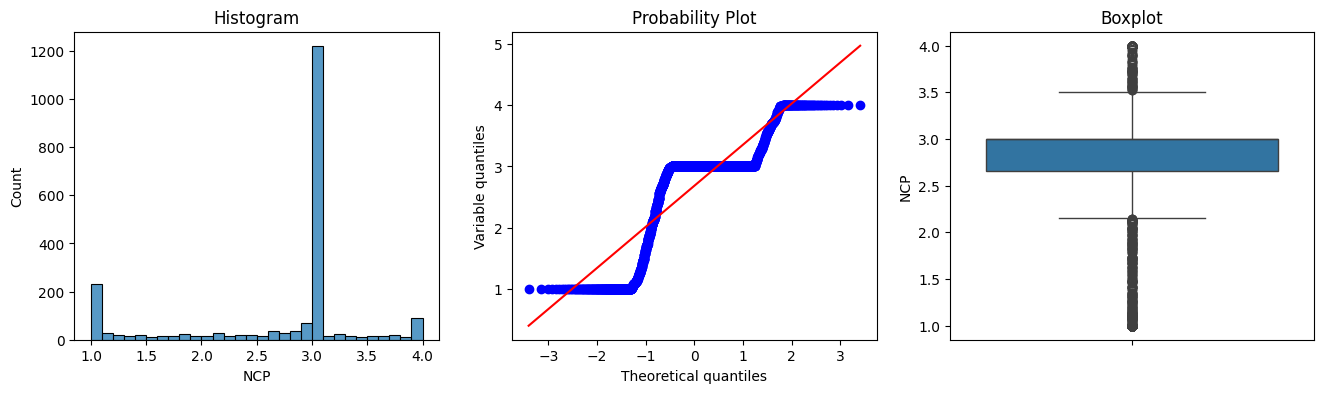

In [53]:
diagnostic_plots(ds, 'NCP')

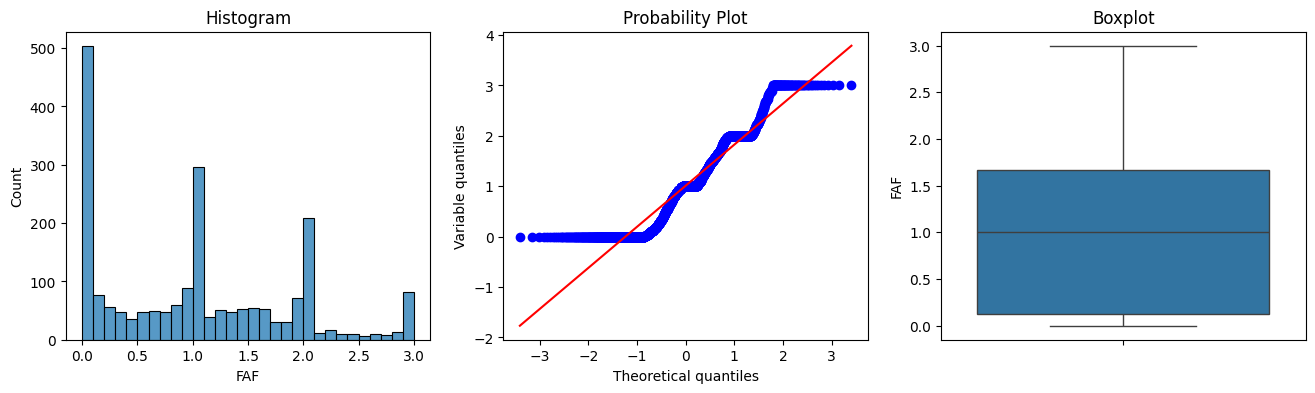

In [54]:
diagnostic_plots(ds, 'FAF')

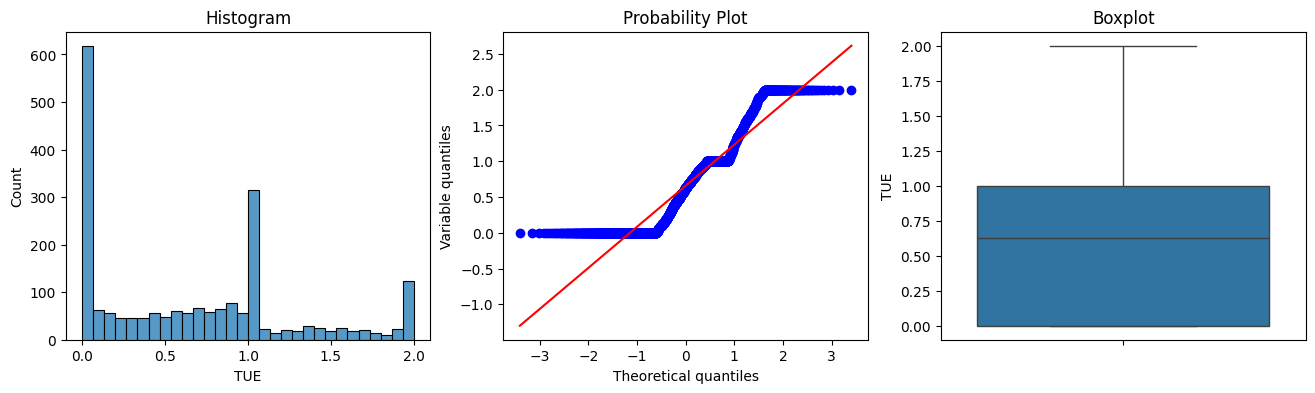

In [55]:
diagnostic_plots(ds, 'TUE')

In [56]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

In [60]:
NCP_upper_limit, NCP_lower_limit = find_skewed_boundaries(ds, 'NCP', 4)
NCP_upper_limit, NCP_lower_limit

(4.365048, 1.2936900000000002)

In [61]:
outliers_NCP = np.where(ds['NCP'] > NCP_upper_limit, True,
                       np.where(ds['NCP'] < NCP_lower_limit, True, False))

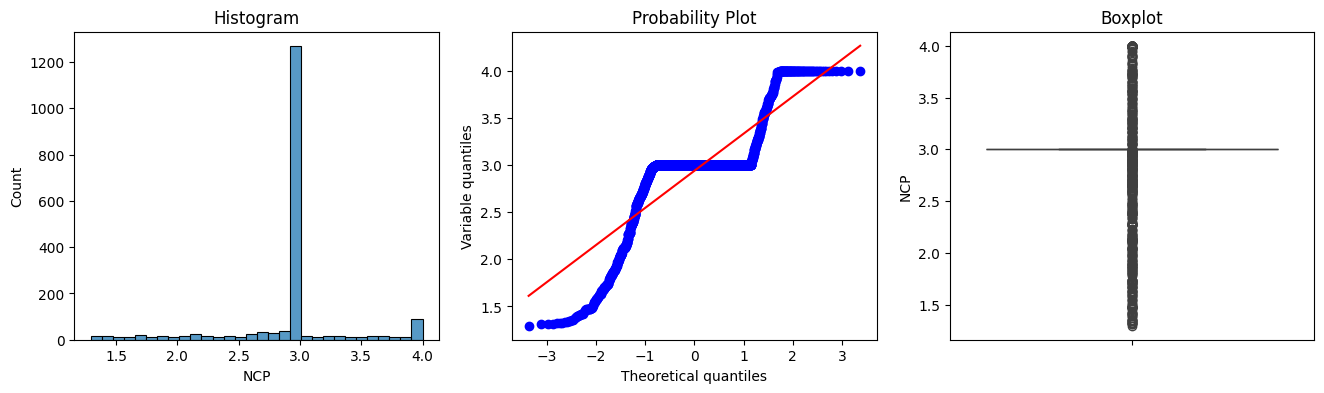

In [62]:
ds_trimmed = ds.loc[~outliers_NCP, ]
ds.shape, ds_trimmed.shape
diagnostic_plots(ds_trimmed, 'NCP')

In [63]:
from sklearn.preprocessing import MinMaxScaler
ds[['FAF', 'CH2O', 'NCP', 'TUE', 'FCVC']].describe()

,FAF,CH2O,NCP,TUE,FCVC
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,1.010298,2.008011,2.685628,0.657866,2.419043
std,0.850592,0.612953,0.778039,0.608927,0.533927
min,0.000000,1.000000,1.000000,0.000000,1.000000
25%,0.124505,1.584812,2.658738,0.000000,2.000000
50%,1.000000,2.000000,3.000000,0.625350,2.385502
75%,1.666678,2.477420,3.000000,1.000000,3.000000
max,3.000000,3.000000,4.000000,2.000000,3.000000


In [64]:
scaler = MinMaxScaler()
scaler.fit(ds[['FAF', 'CH2O', 'NCP', 'TUE', 'FCVC']])
X_train_scaled = scaler.transform(ds[['FAF', 'CH2O', 'NCP', 'TUE', 'FCVC']])

In [65]:
scaler.data_max_

array([3., 3., 4., 2., 3.])

In [66]:
scaler.min_

array([ 0.        , -0.5       , -0.33333333,  0.        , -0.5       ])

In [67]:
scaler.data_range_

array([3., 2., 3., 2., 2.])

In [68]:
X_train = ds[['FAF', 'CH2O', 'NCP', 'TUE', 'FCVC']]
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [69]:
np.round(X_train_scaled.describe(), 1)

,FAF,CH2O,NCP,TUE,FCVC
count,2111.0,2111.0,2111.0,2111.0,2111.0
mean,0.3,0.5,0.6,0.3,0.7
std,0.3,0.3,0.3,0.3,0.3
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.3,0.6,0.0,0.5
50%,0.3,0.5,0.7,0.3,0.7
75%,0.6,0.7,0.7,0.5,1.0
max,1.0,1.0,1.0,1.0,1.0


In [101]:
numeric_columns = ds.select_dtypes(include=['number']).columns.tolist()
string_columns = ds.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:")
print(numeric_columns)

print("\nString Columns:")
print(string_columns)


Numeric Columns:
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

String Columns:
['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']


In [102]:
outlier_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
ds = ds[(np.abs(stats.zscore(ds[outlier_columns])) < 4).all(axis=1)]

In [103]:
cat_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
map_dicts = dict()
for column in cat_columns:
    ds[column] = ds[column].astype('category')
    map_dicts[column] = dict(zip(ds[column], ds[column].cat.codes))
    ds[column] = ds[column].cat.codes
display(ds.sample(15))  

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
1697,23.327836,1,1.754439,119.441207,2,1,1.893428,3.0,0,0,2.000000,1,1.917383,0.936480,2,3,Obesity_Type_II
1304,29.881301,1,1.758189,108.721893,2,1,3.000000,3.0,0,0,1.271178,1,1.944728,0.000000,2,0,Obesity_Type_I
1602,30.188303,1,1.758382,112.100740,2,1,1.387489,3.0,0,0,2.017712,1,0.000000,0.731257,2,0,Obesity_Type_II
343,23.000000,1,1.650000,66.000000,3,0,3.000000,3.0,0,0,2.000000,0,3.000000,0.000000,2,3,Normal_Weight
69,23.000000,1,1.800000,60.000000,2,0,2.000000,3.0,0,0,3.000000,1,0.000000,1.000000,3,3,Normal_Weight
1960,25.950898,0,1.649867,104.791035,2,1,3.000000,3.0,0,0,2.535629,1,0.152713,0.770200,2,3,Obesity_Type_III
1567,30.520854,1,1.784049,120.644178,2,1,2.499108,3.0,0,0,2.040952,1,0.838739,0.489854,2,0,Obesity_Type_II
1235,23.365649,1,1.757691,95.361795,3,1,2.000000,3.0,0,0,3.000000,1,3.000000,2.000000,2,3,Obesity_Type_I
2067,23.647935,0,1.681394,114.479459,2,1,3.000000,3.0,0,0,2.435978,1,0.232742,0.692608,2,3,Obesity_Type_III
840,19.895877,1,1.807330,85.073801,2,1,2.801514,3.0,0,0,2.734782,1,2.207881,0.143675,2,3,Overweight_Level_I


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [105]:
y_column = ['NObeyesdad']
X_columns = ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
           'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
           'CAEC', 'MTRANS']
X = ds[X_columns]
y = ds[y_column]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [108]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        88
      Normal_Weight       0.86      0.97      0.91        97
     Obesity_Type_I       0.98      1.00      0.99        94
    Obesity_Type_II       1.00      1.00      1.00        93
   Obesity_Type_III       1.00      1.00      1.00        94
 Overweight_Level_I       0.96      0.88      0.92        80
Overweight_Level_II       0.98      0.96      0.97        85

           accuracy                           0.97       631
          macro avg       0.97      0.96      0.96       631
       weighted avg       0.97      0.97      0.97       631



In [109]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.80      0.82      0.81        88
      Normal_Weight       0.59      0.56      0.57        97
     Obesity_Type_I       0.56      0.70      0.62        94
    Obesity_Type_II       0.86      0.82      0.84        93
   Obesity_Type_III       0.95      1.00      0.97        94
 Overweight_Level_I       0.51      0.50      0.51        80
Overweight_Level_II       0.45      0.35      0.40        85

           accuracy                           0.68       631
          macro avg       0.68      0.68      0.67       631
       weighted avg       0.68      0.68      0.68       631



In [110]:
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred = gnb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.53      0.97      0.68        88
      Normal_Weight       0.56      0.15      0.24        97
     Obesity_Type_I       0.34      0.43      0.38        94
    Obesity_Type_II       0.54      0.98      0.69        93
   Obesity_Type_III       0.99      0.99      0.99        94
 Overweight_Level_I       0.68      0.29      0.40        80
Overweight_Level_II       0.61      0.20      0.30        85

           accuracy                           0.58       631
          macro avg       0.60      0.57      0.53       631
       weighted avg       0.60      0.58      0.53       631



In [111]:
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)
y_pred = sgd_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.55      1.00      0.71        88
      Normal_Weight       0.62      0.21      0.31        97
     Obesity_Type_I       0.40      0.62      0.49        94
    Obesity_Type_II       0.67      0.96      0.79        93
   Obesity_Type_III       0.84      1.00      0.91        94
 Overweight_Level_I       1.00      0.15      0.26        80
Overweight_Level_II       0.36      0.16      0.23        85

           accuracy                           0.59       631
          macro avg       0.64      0.58      0.53       631
       weighted avg       0.63      0.59      0.54       631



In [112]:
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, y_train)
y_pred = kn_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.84      0.93      0.88        88
      Normal_Weight       0.84      0.56      0.67        97
     Obesity_Type_I       0.84      0.91      0.88        94
    Obesity_Type_II       0.98      0.98      0.98        93
   Obesity_Type_III       0.98      1.00      0.99        94
 Overweight_Level_I       0.78      0.84      0.81        80
Overweight_Level_II       0.82      0.88      0.85        85

           accuracy                           0.87       631
          macro avg       0.87      0.87      0.86       631
       weighted avg       0.87      0.87      0.86       631



In [113]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.89      0.94        88
      Normal_Weight       0.84      0.90      0.87        97
     Obesity_Type_I       0.93      0.93      0.93        94
    Obesity_Type_II       0.96      0.98      0.97        93
   Obesity_Type_III       0.99      0.97      0.98        94
 Overweight_Level_I       0.87      0.90      0.88        80
Overweight_Level_II       0.93      0.93      0.93        85

           accuracy                           0.93       631
          macro avg       0.93      0.93      0.93       631
       weighted avg       0.93      0.93      0.93       631



In [118]:
import pandas as pd
results = {
    "Модель": ["Випадковий ліс", "Логістична регресія", "Наївний Баєсівський класифікатор", 
               "SGD класифікатор", "K-найближчих сусідів", "Дерева рішень"],
    "Точність": [0.97, 0.68, 0.60, 0.63, 0.87, 0.93],
    "Повнота": [0.97, 0.68, 0.58, 0.59, 0.87, 0.93],
    "F1-показник": [0.97, 0.68, 0.53, 0.54, 0.86, 0.93],
    "Загальна точність": [0.97, 0.68, 0.58, 0.59, 0.87, 0.93]
}
df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))

                          Модель  Точність  Повнота  F1-показник  Загальна точність
                  Випадковий ліс      0.97     0.97         0.97               0.97
             Логістична регресія      0.68     0.68         0.68               0.68
Наївний Баєсівський класифікатор      0.60     0.58         0.53               0.58
                SGD класифікатор      0.63     0.59         0.54               0.59
            K-найближчих сусідів      0.87     0.87         0.86               0.87
                   Дерева рішень      0.93     0.93         0.93               0.93


In [119]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],  # Кількість дерев
    'max_depth': [None, 10, 20, 30],   # Максимальна глибина дерева
    'min_samples_split': [2, 5, 10],   # Мінімальна кількість зразків, необхідна для розгалуження вузла
    'min_samples_leaf': [1, 2, 4],      # Мінімальна кількість зразків, необхідна для листового вузла
    'bootstrap': [True, False]          # Випадкове вибірка замість підвибірки заміщенням
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=100, cv=5, scoring='f1_weighted', random_state=42)
random_search.fit(X_train, y_train)

print("Кращі параметри за допомогою сітки:", grid_search.best_params_)
print("Кращі параметри за допомогою рандомного пошуку:", random_search.best_params_)

Кращі параметри за допомогою сітки: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Кращі параметри за допомогою рандомного пошуку: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}


In [124]:
grid = GridSearchCV(estimator=rf_classifier, 
                    param_grid=param_grid, 
                    scoring='precision', 
                    cv=5,
                    verbose = 3,
                    return_train_score=True)

grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),
                          pd.DataFrame(grid.cv_results_["mean_test_score"], 
                          columns=["precision"])],
                          axis=1)

grid_results

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=nan, test=nan) total time=   0.5s
[CV 2/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=nan, test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=nan, test=nan) total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=nan, test=nan) total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=nan, test=nan) total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=nan, test=nan) total time=   0.7s
[CV 2/5] END bootstrap=T

,bootstrap,max_depth,min_samples_leaf,min_samples_split,n_estimators,precision
0,True,NaN,1,2,100,NaN
1,True,NaN,1,2,200,NaN
2,True,NaN,1,2,300,NaN
3,True,NaN,1,5,100,NaN
4,True,NaN,1,5,200,NaN
...,...,...,...,...,...,...
211,False,30.0,4,5,200,NaN
212,False,30.0,4,5,300,NaN
213,False,30.0,4,10,100,NaN
214,False,30.0,4,10,200,NaN


In [125]:
grid_results.columns

Index(['bootstrap', 'max_depth', 'min_samples_leaf', 'min_samples_split',
       'n_estimators', 'precision'],
      dtype='object')

In [127]:
grid_contour = grid_results.groupby([  'max_depth', 'min_samples_leaf',
       'min_samples_split', 'n_estimators']).mean()
grid_contour

bootstrap  \
max_depth min_samples_leaf min_samples_split n_estimators              
10.0      1                2                 100                 0.5   
                                             200                 0.5   
                                             300                 0.5   
                           5                 100                 0.5   
                                             200                 0.5   
...                                                              ...   
30.0      4                5                 200                 0.5   
                                             300                 0.5   
                           10                100                 0.5   
                                             200                 0.5   
                                             300                 0.5   

                                                           precision  
max_depth min_samples_leaf min_samples_split n_estimators             
10.0      1                2                 100                 NaN  
                                             200                 NaN  
                                             300                 NaN  
                           5                 100                 NaN  
                                             200                 NaN  
...                                                              ...  
30.0      4                5                 200                 NaN  
                                             300                 NaN  
                           10                100                 NaN  
                                             200                 NaN  
                                             300                 NaN  

[81 rows x 2 columns]

In [128]:
# Виведення кількості прикладів у кожному класі
print(ds['NObeyesdad'].value_counts())

NObeyesdad
Obesity_Type_I         350
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     289
Normal_Weight          285
Overweight_Level_II    284
Insufficient_Weight    272
Name: count, dtype: int64


In [129]:
from sklearn.ensemble import RandomForestClassifier
# Створення моделі з автоматичним налаштуванням ваг класів
rf_classifier = RandomForestClassifier(class_weight='balanced')
# Тренування моделі з виправленням незбалансованості
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [130]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.92      0.96        88
      Normal_Weight       0.86      0.96      0.91        97
     Obesity_Type_I       0.99      0.98      0.98        94
    Obesity_Type_II       0.99      1.00      0.99        93
   Obesity_Type_III       1.00      1.00      1.00        94
 Overweight_Level_I       0.94      0.90      0.92        80
Overweight_Level_II       0.98      0.96      0.97        85

           accuracy                           0.96       631
          macro avg       0.96      0.96      0.96       631
       weighted avg       0.96      0.96      0.96       631



In [131]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Weight (0.348354)
2. Height (0.098482)
3. Age (0.091445)
4. FCVC (0.089732)
5. Gender (0.052780)
6. NCP (0.049962)
7. TUE (0.049468)
8. CH2O (0.042664)
9. FAF (0.041271)
10. family_history_with_overweight (0.033392)
11. CAEC (0.031690)
12. CALC (0.028413)
13. MTRANS (0.019393)
14. FAVC (0.015641)
15. SCC (0.005214)
16. SMOKE (0.002099)


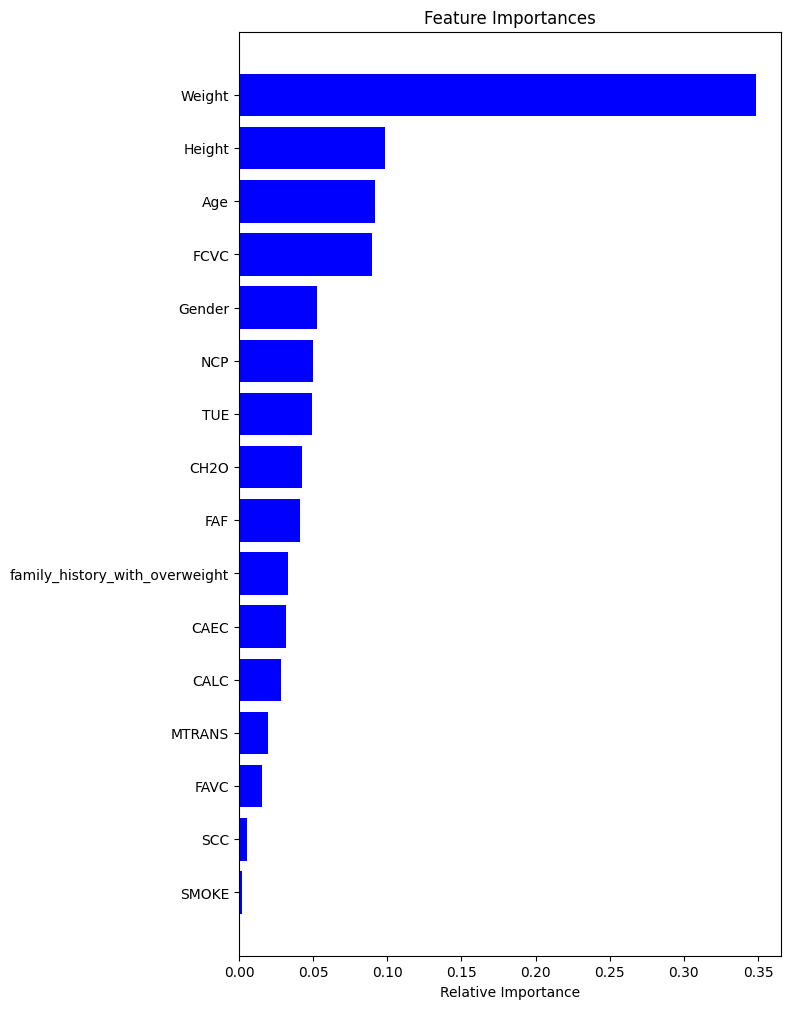

In [132]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [133]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(gnb_classifier, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Weight (0.159113)
2. Gender (0.113788)
3. FCVC (0.107132)
4. family_history_with_overweight (0.069097)
5. NCP (0.062124)
6. CALC (0.061807)
7. CAEC (0.052615)
8. FAVC (0.051664)
9. MTRANS (0.029794)
10. SCC (0.025357)
11. Age (0.009826)
12. SMOKE (0.003803)
13. CH2O (0.003170)
14. FAF (0.002853)
15. Height (-0.000634)
16. TUE (-0.001268)


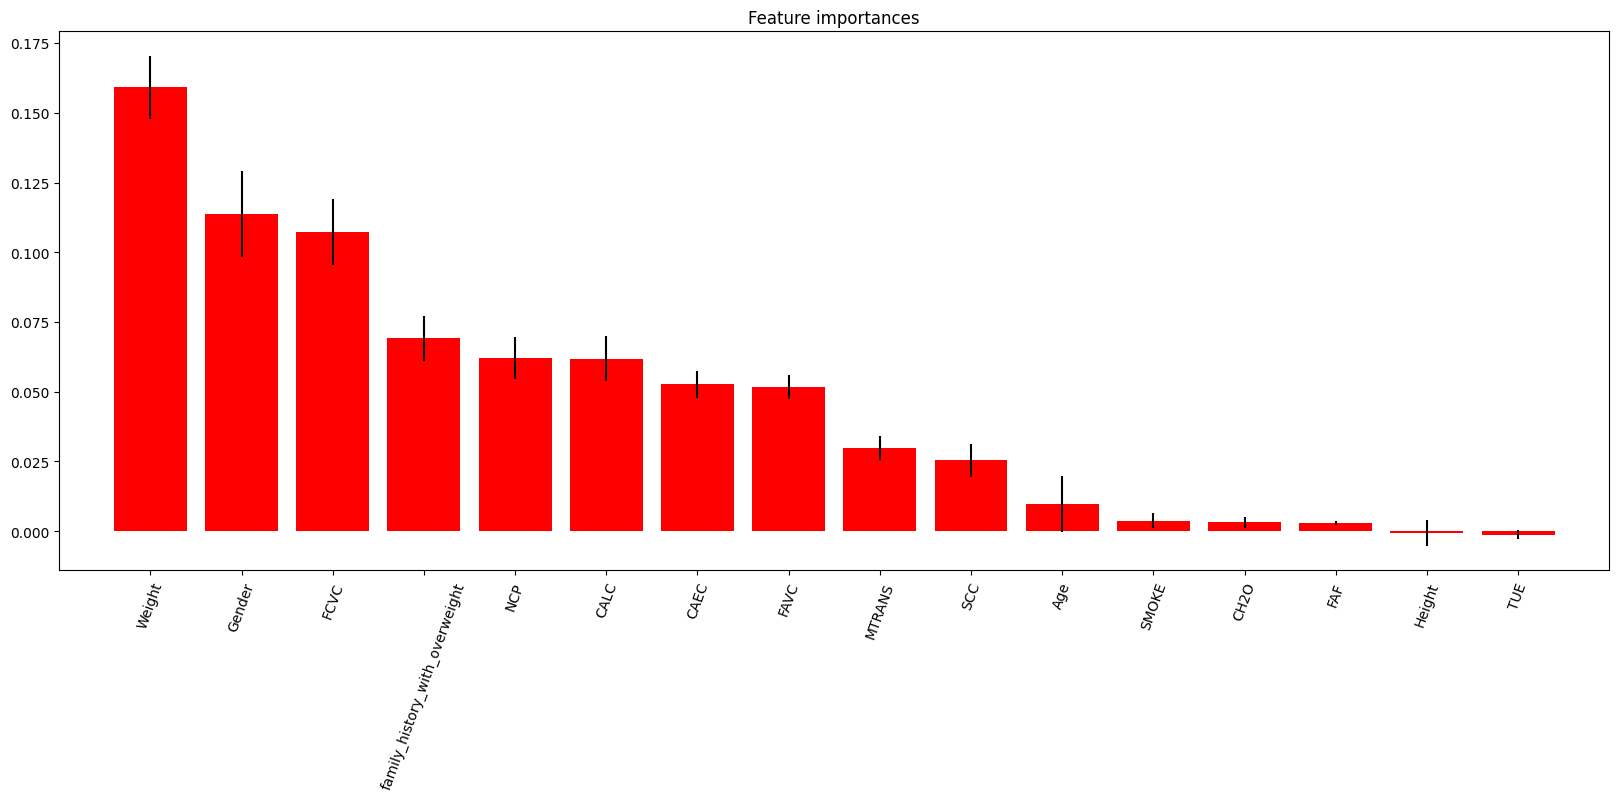

In [134]:
plt.figure(figsize=(20, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_columns[indices[f]] for f in range(X_train.shape[1])])
plt.xticks(rotation=70)
plt.xlim([-1, X_train.shape[1]])
plt.show()